<h1 align="center"><img src="sg.jpg" height="42" width="42"/></h1>
<h1><font color="red">Credit default</font></h1>
<h4>Created by Issame SARROUKH</h4>

In [3]:
from imblearn.over_sampling import SMOTE

Credit default is a major financial expense for a bank, hence banks strive to establish systems that can effectively anticipate such issue. Machine learning bases its evaluation on historical data, it allows to have a good understanding of the customer's behaviour. The goal of this notebook is to introduce the steps involved in the design of a machine learning algorithm for default prediction. 

Importing some useful Python libraries

In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import datetime
import matplotlib.pyplot as plt 
from matplotlib import colors 
from sklearn.model_selection import train_test_split
RANDOM_STATE=0

Data Importation

In [5]:
account = pd.read_csv("account.csv", sep=";")
card = pd.read_csv("card.csv", sep=";") 
disp = pd.read_csv("disp.csv", sep=";")
client = pd.read_csv("client.csv", sep=";")
district = pd.read_csv("district.csv", sep=";") 
order = pd.read_csv("order.csv", sep=";")
loan = pd.read_csv("loan.csv", sep=";")  
trans = pd.read_csv("trans.csv", sep=";") 

C:\Users\issam\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
trans[trans["account_id"]==2378] 

trans_id  account_id    date    type       operation   amount  \
0          695247        2378  930101  PRIJEM           VKLAD    700.0   
95         695250        2378  930122  PRIJEM           VKLAD   7268.0   
100        695266        2378  930123  PRIJEM           VKLAD  14440.0   
104        695262        2378  930124  PRIJEM           VKLAD  49752.0   
113        695265        2378  930126  PRIJEM           VKLAD  21899.0   
136        695560        2378  930131   VYDAJ           VYBER  34700.0   
167       3608592        2378  930131  PRIJEM             NaN     94.7   
200        695272        2378  930205  PRIJEM           VKLAD  30192.0   
233        695340        2378  930207   VYDAJ  PREVOD NA UCET   9612.0   
300        695270        2378  930211  PRIJEM           VKLAD  31038.0   
301        695561        2378  930211   VYDAJ           VYBER  25200.0   
397        695251        2378  930220  PRIJEM           VKLAD  19136.0   
398        695562        2378  930220   VYDAJ           VYBER  33900.0   
465        695490        2378  930228   VYDAJ           VYBER     14.6   
542       3608593        2378  930228  PRIJEM             NaN    344.8   
576        695563        2378  930302   VYDAJ           VYBER  21400.0   
581        695254        2378  930303  PRIJEM           VKLAD   7077.0   
659        695341        2378  930307   VYDAJ  PREVOD NA UCET   9612.0   
1062       695491        2378  930331   VYDAJ           VYBER     14.6   
1201      3608594        2378  930331  PRIJEM             NaN    209.4   
1248       695564        2378  930401   VYDAJ           VYBER  13500.0   
1365       695342        2378  930407   VYDAJ  PREVOD NA UCET   9612.0   
1721       695259        2378  930419  PRIJEM           VKLAD  29841.0   
1763       695460        2378  930422   VYDAJ           VYBER   1500.0   
1817       695269        2378  930426  PRIJEM           VKLAD  15105.0   
1888       695492        2378  930430   VYDAJ           VYBER     14.6   
2093      3608595        2378  930430  PRIJEM             NaN    179.9   
2161       695565        2378  930501   VYDAJ           VYBER  22700.0   
2174       695264        2378  930502  PRIJEM           VKLAD  42538.0   
2327       695343        2378  930507   VYDAJ  PREVOD NA UCET   9612.0   
...           ...         ...     ...     ...             ...      ...   
908325     695405        2378  980707   VYDAJ  PREVOD NA UCET   9612.0   
919070     695436        2378  980720   VYBER           VYBER   5129.0   
921623     695555        2378  980731   VYDAJ           VYBER     14.6   
928514    3608658        2378  980731  PRIJEM             NaN    165.2   
931103     695643        2378  980803  PRIJEM           VKLAD   5600.0   
933867     695406        2378  980807   VYDAJ  PREVOD NA UCET   9612.0   
937242     695327        2378  980810  PRIJEM           VKLAD  35078.0   
943816     695334        2378  980817  PRIJEM           VKLAD  13288.0   
946397     695325        2378  980828  PRIJEM           VKLAD  32990.0   
947246     695556        2378  980831   VYDAJ           VYBER     14.6   
954151    3608659        2378  980831  PRIJEM             NaN    266.5   
956477     695644        2378  980902   VYDAJ           VYBER  33700.0   
959500     695407        2378  980907   VYDAJ  PREVOD NA UCET   9612.0   
971352     695331        2378  980925  PRIJEM           VKLAD  23631.0   
972665     695557        2378  980930   VYDAJ           VYBER     14.6   
979558    3608660        2378  980930  PRIJEM             NaN    330.2   
981936     695645        2378  981002   VYDAJ           VYBER  20600.0   
984967     695408        2378  981007   VYDAJ  PREVOD NA UCET   9612.0   
994668     695485        2378  981016   VYDAJ           VYBER   6600.0   
998389     695558        2378  981031   VYDAJ           VYBER     14.6   
1005258   3608661        2378  981031  PRIJEM             NaN    258.3   
1007427    695646        2378  981101   VYDAJ           VYBER   7900.0   
1010665    69

In [4]:
trans[trans["account_id"]==485].loc[900:1400] 

trans_id  account_id    date    type       operation   amount  balance  \
992     144560         485  930326  PRIJEM           VKLAD  49112.0  93768.9   
994     144918         485  930326   VYBER           VYBER   5166.0  88602.9   
1100    145058         485  930331   VYDAJ           VYBER    100.0  69568.0   
1101    144919         485  930331   VYBER           VYBER  19168.0  69668.0   
1148   3546685         485  930331  PRIJEM             NaN    233.1  88836.0   
1282    145129         485  930404   VYDAJ           VYBER  21100.0  48468.0   
1335    144777         485  930406   VYDAJ  PREVOD NA UCET   1591.0  46877.0   
1371    144849         485  930407   VYDAJ  PREVOD NA UCET   3572.0  43305.0   

      k_symbol bank     account  
992        NaN  NaN         NaN  
994        NaN  NaN         NaN  
1100    SLUZBY  NaN         NaN  
1101       NaN  NaN         NaN  
1148      UROK  NaN         NaN  
1282       NaN  NaN         NaN  
1335             WX  56978738.0  
1371  POJISTNE   AB  20747721.0

In [5]:
trans[trans["type"]=="VYBER"]

trans_id  account_id    date   type operation   amount   balance  \
994        144918         485  930326  VYBER     VYBER   5166.0   88602.9   
1101       144919         485  930331  VYBER     VYBER  19168.0   69668.0   
1650       615628        2099  930414  VYBER     VYBER  20200.0   27692.5   
1686       144921         485  930417  VYBER     VYBER  14491.0   21393.0   
2081       527820        1801  930430  VYBER     VYBER   5669.0   71710.8   
2375      1450329        4937  930507  VYBER     VYBER  12297.0   27047.9   
2748      1657450        5622  930515  VYBER     VYBER  12595.0   23336.8   
2752      1313239        4484  930515  VYBER     VYBER   3725.0   53430.9   
2753       989939        3374  930515  VYBER     VYBER  23997.0   55247.1   
2762      2349880        7753  930516  VYBER     VYBER  16818.0   26731.9   
2765       144922         485  930516  VYBER     VYBER   4661.0   34195.4   
2888      1779182        6034  930522  VYBER     VYBER   2025.0   52618.1   
2905       144920         485  930523  VYBER     VYBER   9007.0   40902.4   
2907       576917        1965  930523  VYBER     VYBER   6387.0   76396.5   
2964       452928        1539  930526  VYBER     VYBER  19356.0   67012.1   
2998      1100934        3760  930527  VYBER     VYBER  18851.0   83895.1   
3491       576916        1965  930602  VYBER     VYBER  22875.0   53694.8   
3495      1208623        4134  930602  VYBER     VYBER   5931.0   44197.7   
3530       527818        1801  930603  VYBER     VYBER   8013.0   48337.0   
3548      2135357        7231  930604  VYBER     VYBER  16149.0   84205.3   
4004      1779183        6034  930611  VYBER     VYBER  17362.0   55149.6   
4031       110614         374  930611  VYBER     VYBER   8278.0   20388.9   
4052      1548895        5270  930611  VYBER     VYBER  10027.0   64589.4   
4073      1779178        6034  930612  VYBER     VYBER   4214.0   50935.6   
4109      1100943        3760  930612  VYBER     VYBER   2552.0   89318.6   
4358       576914        1965  930616  VYBER     VYBER   9961.0   24092.8   
4384       452036        1536  930617  VYBER     VYBER  10502.0   19370.4   
4537       237796         813  930622  VYBER     VYBER  24322.0   20765.3   
4569      1657456        5622  930623  VYBER     VYBER   2161.0   57438.7   
4674      1779186        6034  930627  VYBER     VYBER   9272.0   46888.6   
...           ...         ...     ...    ...       ...      ...       ...   
1051338    104167         355  981228  VYBER     VYBER  16041.0   21600.2   
1051349   2699009        8931  981229  VYBER     VYBER  14253.0   60880.8   
1051359     22048          72  981229  VYBER     VYBER  18152.0   22117.2   
1051369    648252        2216  981229  VYBER     VYBER  15306.0   59683.4   
1051372    235318         803  981229  VYBER     VYBER   5184.0   12699.8   
1051395    532356        1813  981229  VYBER     VYBER  23323.0   90603.0   
1051437    755043        2576  981229  VYBER     VYBER   3726.0   63494.0   
1051442   1273158        4354  981229  VYBER     VYBER  17984.0   53767.8   
1051467   1207609        4131  981229  VYBER     VYBER   3808.0   80853.4   
1051471    483743        1646  981229  VYBER     VYBER   6251.0   86619.4   
1051483    157115         525  981229  VYBER     VYBER  13311.0   98433.3   
1051500    875425        2982  981229  VYBER     VYBER   2052.0   69641.2   
1051554   1460009        4969  981229  VYBER     VYBER   3129.0  101151.3   
1051556    252007         863  981229  VYBER     VYBER  12779.0   55376.2   
1051563   2967317        9828  981229  VYBER     VYBER   4592.0   37876.3   
1051584    960852        3273  981230  VYBER     VYBER  14877.0   -6200.8   
1051596   1787304        6062  981230  VYBER     VYBER  14988.0   41482.8   
1051597    471856        1605  981230  VYBER     VYBER  17913.0   49332.3   
1051609   1075762        3675  981230  VYBER     VYBER  11635.0   32431.0   
1051652    312456        1066  981230  VYBER     VYBER  17168.0   78957.7   
10516

<p>We define a strategy to merge the data in order to have a single data set.</p>
<img src="data_map.gif"></img> 
<p> We begin by examining the different data sets.</p>

In [6]:
# display data sets and numbers of rows
names = ["Account", "Card","District", "Client", "Disposition", "Order", "Loans", "Transactions"] 
data = [account, card, district, client, disp, order, loan, trans]
for name, dataset in zip(names, data):
    print(name)
    display(dataset.head())
    print("Number of rows %d"%(len(dataset)))
    print(50*"-") 

Account


account_id  district_id         frequency    date
0         576           55  POPLATEK MESICNE  930101
1        3818           74  POPLATEK MESICNE  930101
2         704           55  POPLATEK MESICNE  930101
3        2378           16  POPLATEK MESICNE  930101
4        2632           24  POPLATEK MESICNE  930102

Number of rows 4500
--------------------------------------------------
Card


card_id  disp_id     type           issued
0     1005     9285  classic  931107 00:00:00
1      104      588  classic  940119 00:00:00
2      747     4915  classic  940205 00:00:00
3       70      439  classic  940208 00:00:00
4      577     3687  classic  940215 00:00:00

Number of rows 892
--------------------------------------------------
District


A1           A2               A3       A4  A5  A6  A7  A8  A9    A10  \
0   1  Hl.m. Praha           Prague  1204953   0   0   0   1   1  100.0   
1   2      Benesov  central Bohemia    88884  80  26   6   2   5   46.7   
2   3       Beroun  central Bohemia    75232  55  26   4   1   5   41.7   
3   4       Kladno  central Bohemia   149893  63  29   6   2   6   67.4   
4   5        Kolin  central Bohemia    95616  65  30   4   1   6   51.4   

     A11   A12   A13  A14    A15    A16  
0  12541  0.29  0.43  167  85677  99107  
1   8507  1.67  1.85  132   2159   2674  
2   8980  1.95  2.21  111   2824   2813  
3   9753  4.64  5.05  109   5244   5892  
4   9307  3.85  4.43  118   2616   3040

Number of rows 77
--------------------------------------------------
Client


client_id  birth_number  district_id
0          1        706213           18
1          2        450204            1
2          3        406009            1
3          4        561201            5
4          5        605703            5

Number of rows 5369
--------------------------------------------------
Disposition


disp_id  client_id  account_id       type
0        1          1           1      OWNER
1        2          2           2      OWNER
2        3          3           2  DISPONENT
3        4          4           3      OWNER
4        5          5           3  DISPONENT

Number of rows 5369
--------------------------------------------------
Order


order_id  account_id bank_to  account_to  amount k_symbol
0     29401           1      YZ    87144583  2452.0     SIPO
1     29402           2      ST    89597016  3372.7     UVER
2     29403           2      QR    13943797  7266.0     SIPO
3     29404           3      WX    83084338  1135.0     SIPO
4     29405           3      CD    24485939   327.0

Number of rows 6471
--------------------------------------------------
Loans


loan_id  account_id    date  amount  duration  payments status
0     5314        1787  930705   96396        12    8033.0      B
1     5316        1801  930711  165960        36    4610.0      A
2     6863        9188  930728  127080        60    2118.0      A
3     5325        1843  930803  105804        36    2939.0      A
4     7240       11013  930906  274740        60    4579.0      A

Number of rows 682
--------------------------------------------------
Transactions


trans_id  account_id    date    type operation  amount  balance k_symbol  \
0    695247        2378  930101  PRIJEM     VKLAD   700.0    700.0      NaN   
1    171812         576  930101  PRIJEM     VKLAD   900.0    900.0      NaN   
2    207264         704  930101  PRIJEM     VKLAD  1000.0   1000.0      NaN   
3   1117247        3818  930101  PRIJEM     VKLAD   600.0    600.0      NaN   
4    579373        1972  930102  PRIJEM     VKLAD   400.0    400.0      NaN   

  bank  account  
0  NaN      NaN  
1  NaN      NaN  
2  NaN      NaN  
3  NaN      NaN  
4  NaN      NaN

Number of rows 1056320
--------------------------------------------------


<h2><font color="blue">1. Dataset construction</font></h2>

In [7]:
# convert dates to the proper format
def convert_to_date(data, column, number=0): 
    if number ==0 : 
        data["month"] = (data[column]//100)%100 
        data["sex"] = 1*((50 - data["month"])>0)
        data.drop(columns="month", inplace = True)
        data[column] = 19000000 + data[column] - 5000*(1- data["sex"]) 
    elif number == 1:  
        data[column] = "19" + data[column].str.extract('^(\d+)') 
    
    else: 
        data[column] = 19000000 + data[column] 
    
    data[column] = pd.to_datetime(data[column].astype("str"), format="%Y%m%d") 
    

In [8]:
# use the defined function to convert dates to datetimes format
convert_to_date(client, "birth_number")
convert_to_date(card, "issued", number=1) 
convert_to_date(account, "date", number=-1)
convert_to_date(loan, "date", number=-1)  
convert_to_date(trans, "date", number=-1)

In [9]:
# Merge the datasets
data = account.merge(disp, on="account_id", how="left")
data = data.merge(loan, on="account_id", how="right", suffixes=("_account", "_loan")) 
data = data.merge(client,on='client_id',how='left',suffixes=('_bank','_client'))
data = data.merge(card, on="disp_id", how="left", suffixes=("_disp", "_card"))
# from the description in the website only owner can issue permanent orders and ask for a loan
data = data[data["type_disp"]=="OWNER"] 
data.drop(columns="type_disp", inplace=True)
len(data) 

682

<h2><font color="blue">2. Feature engineering and Data cleaning</font></h2>

In [10]:
# calculate the person's age at the time the loan is granted.
from dateutil.relativedelta import relativedelta
data["age"] = data[["date_loan", "birth_number"]].apply(lambda x: relativedelta(x.date_loan, x.birth_number).years, axis=1)

In [11]:
# the time elapsed between the creation of the account and the issuance of the loan.
data["diff_time"] = (data["date_loan"] - data["date_account"]).dt.days  

In [12]:
# we specify the number of users of an account as a component in building the data set.
number_clients = disp[disp["account_id"].isin(data["account_id"])].groupby("account_id", as_index=False)["client_id"].count()
number_clients = number_clients.rename(columns = {"client_id": "num_clients"})
data = data.merge(number_clients, on="account_id", how="inner")

In [13]:
# Some clients do not have a credit card, we replace NaN in the card type column with no_card.
data["type_card"].fillna("no_card", inplace=True)

<p>The target value of our classifier is to assess whether a loan will be in default.</p>
<p>We should only use past data to see if the user is able to reimburse the loan.</p>
<p>For now, we need to get our target values.</p>
<p>Description of the data on the website:</p>
<font color=green>
<p>status of paying off the loan: </p>
<ul>
    <li>'A' stands for contract finished, no problems,</li>
    <li>'B' stands for contract finished, loan not payed,</li> 
    <li>'C' stands for running contract, OK so far,</li> 
    <li>'D' stands for running contract, client in debt</li>
</ul>
</font>  
<p>We view the problem as a binary classification problem where A and C refers to 0 and B and D to 1.
An underlying problem arises because we have no idea if in the future the loan granted to the client of an account belonging to class C will not default in the future or that an account of class D will not resolve his debt, we shall determine in the prediction whether the removal of these two classes will result in a significant increase in performance.</p>

In [14]:
data["default"] = data["status"].isin(("B", "D")) 

The data is skewed, precision will not be the ideal metric to evaluate the model, we for now focus on evaluating, constructing and visualizing the validity of the choice of features.

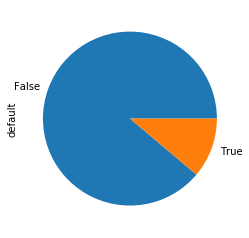

In [15]:
(100*data["default"].value_counts()/len(data)).plot.pie() 

We should use transaction data since it provides a good overview of the customer's behaviour.

We have to spot customers who are prudent when dealing with their accounts. We might calculate amount/balance, if the user is careful with his account, the value is small since the client keeps an eye on his expenses and always anticipates any new transactions, the computation of this value should take into account the date on which the loan was granted since only the past value - before the loan was granted - are allowed. We treat the amount or balance when it is positive and when it is negative as separate entities and add them to the data set as well. Standard deviation measures in a sense how the user spends his money; it is a good measure, as defaulters are prone to have a history of spending in the absence of any thought.

In [16]:
import numpy as np 
def add_features(trans, data): 
    table = data.merge(trans, how='inner', on="account_id", suffixes=("_loan", "_trans"))
    table["diff"] = (table["date_loan"]-table["date"])>datetime.timedelta(0)
    # verify if all the clients that are not defaulters have always a positive balance in the past
    print((table.loc[(table["default"]==0)& (table["diff"]), "balance"]<0).sum())
    table["trans_type"] = table["type"].isin(["VYBER", "VYDAJ"]) 
    table["balance_before"] = table["balance"] + (2*table["trans_type"]-1)*table["amount_trans"]
    table["perc"] = table["amount_trans"]/table["balance_before"]
    table.loc[~table["trans_type"], "perc"]= np.nan 
    table["amount_trans"] = -1*(2*table["trans_type"]-1)*table["amount_trans"]
    table["pos_perc"] = table["perc"] 
    table["neg_perc"] = table["perc"]
    table.loc[table["perc"]<0, "pos_perc"] = np.nan
    table.loc[table["perc"]>0, "neg_perc"] = np.nan
    groups = table[table["diff"]].groupby("account_id")
    columns = ["balance", "amount_trans", "perc", "pos_perc", "neg_perc"]
    for column in columns: 
        data = data.merge(groups[column].mean().reset_index().rename(columns={column:"mean_"+column}), on="account_id", how="inner")
        data = data.merge(groups[column].std(ddof=0).reset_index().rename(columns={column:"std_"+column}), on="account_id", how="inner") 
    return data 


In [17]:
# Some users have never had a negative balance.
data = add_features(trans, data) 
columns = ["mean_pos_perc", "std_pos_perc", "mean_neg_perc", "std_neg_perc", "mean_perc", "std_perc"]
data[columns] = data[columns].fillna(0) 

0


We add district information, the identifier of the district where the client resides will be used to combine the two data sets, in addition we add a new column that specifies whether or not the bank is located in the same area where the client presumably lives.

In [18]:
# rename columns in district dataframe
names = ["district_id", "district_name", "region", "no_inhabitants", "mini_inf_499",
        "mini_bet_500_1999", "mini_bet_2000_9999", "min_sup_10000", "no_cities",
        "ration_urban", "average_salary", "unemp_95", "unemp_96","no_entrep",
        "no_crimes_95", "no_crimes_96"]
rename={}
for idx, name in enumerate(names):
    rename["A%d"%(idx+1)] = names[idx] 

district = district.rename(columns=rename)

In [19]:
data = data.merge(district, how="left", left_on=["district_id_client"], right_on=["district_id"]) 

In [20]:
data["in_dist_bank_client"] = 1*(data["district_id_client"]==data["district_id_bank"])

In [21]:
# we verify if a numerical column is of the object type as a result of missing values
data.describe(include="O") 

frequency status type_card district_name         region  \
count                682    682       682           682            682   
unique                 3      4         4            77              8   
top     POPLATEK MESICNE      C   no_card   Hl.m. Praha  south Moravia   
freq                 559    403       512            79            133   

       unemp_95 no_crimes_95  
count       682          682  
unique       71           76  
top        0.29        85677  
freq         79           79

 The variables unemp_95 and no_crimes_95 must be numerical, something is wrong.

In [22]:
print(data["unemp_95"].unique())
print(data["no_crimes_95"].unique()) 

['2.79' '3.13' '1.88' '1.60' '6.63' '1.95' '4.64' '1.42' '2.80' '3.52'
 '3.73' '4.75' '2.28' '1.12' '1.79' '3.79' '4.83' '0.29' '7.08' '2.52'
 '3.85' '4.01' '0.45' '3.38' '1.78' '2.82' '1.39' '2.83' '6.49' '1.29'
 '1.89' '2.77' '3.24' '1.51' '3.45' '5.77' '5.74' '0.56' '4.73' '0.65'
 '4.09' '2.41' '7.34' '3.83' '1.02' '1.67' '4.69' '2.65' '3.32' '2.38'
 '3.80' '2.51' '5.38' '4.76' '3.51' '5.75' '2.64' '1.72' '1.62' '6.43'
 '2.26' '3.39' '4.46' '?' '5.93' '1.25' '3.33' '1.10' '2.53' '2.95' '2.47']
['2166' '1845' '3659' '18721' '9878' '2824' '5244' '6604' '4340' '1328'
 '3729' '18782' '2080' '1874' '2854' '1562' '2123' '85677' '2653' '2564'
 '2616' '4484' '3460' '3475' '2985' '1655' '818' '2879' '5198' '1740'
 '6949' '2719' '1660' '1597' '2595' '6079' '1879' '3244' '2157' '2212'
 '3810' '3736' '1029' '5623' '1658' '2299' '4947' '3804' '3384' '2159'
 '1563' '6445' '1003' '9672' '3496' '4063' '2112' '2247' '4650' '6041'
 '4085' '1580' '5323' '4289' '999' '2987' '4147' '?' '4980' '5179' '43

? is unambiguously the missing value, we examine unemp_95 and no_crimes_95 to determine if it is essential to keep them. We check whether there is a correlation between "unemp_95" and "unemp_96", and no_crimes_95" and "no_crimes_96".

In [23]:
unemp_95 = data.loc[~(data["unemp_95"]=="?"), "unemp_95"].astype("float") 
unemp_96 = data.loc[~(data["unemp_95"]=="?"), "unemp_96"].astype("float") 
no_crimes_95 = data.loc[~(data["no_crimes_95"]=="?"), "no_crimes_95"].astype("float") 
no_crimes_96 = data.loc[~(data["no_crimes_95"]=="?"), "no_crimes_96"].astype("float") 
sns.jointplot(x=unemp_95, y=unemp_96) 
sns.jointplot(x=no_crimes_95, y=no_crimes_96)
             

C:\Users\issam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


The variables are explicitly linearly dependant, we reject both. 

We remove features that we do not need

In [24]:
drop_columns = ["account_id", "disp_id", "loan_id", "disp_id", "card_id", "issued", "district_id_bank",
               "unemp_95", "no_crimes_95", "district_id_client", "client_id", "district_id"]
data.drop(columns=drop_columns, inplace=True)

Check if there is any missing values

In [25]:
#count NaN values and normalize 
perc_missing_values = ((len(data)-data.count(axis=0))/len(data))
perc_missing_values[perc_missing_values>0]

Series([], dtype: float64)

There isn't any.

In [26]:
# convert to categorical 
to_catgo = ["in_dist_bank_client", "sex", "duration", "frequency", "status", "type_card", 'district_name', 'region', "num_clients"]
data[to_catgo] = data[to_catgo].astype("category")

In [27]:
data.describe(include="category")  

frequency  duration status  sex type_card  num_clients  \
count                682       682    682  682       682          682   
unique                 3         5      4    2         4            2   
top     POPLATEK MESICNE        60      C    0   no_card            1   
freq                 559       145    403  348       512          537   

       district_name         region  in_dist_bank_client  
count            682            682                  682  
unique            77              8                    2  
top      Hl.m. Praha  south Moravia                    1  
freq              79            133                  622

In [28]:
data.describe() 

amount     payments         age   diff_time  mean_balance  \
count     682.000000   682.000000  682.000000  682.000000    682.000000   
mean   151410.175953  4190.664223   37.630499  398.240469  43606.789462   
std    113372.406310  2215.830344   12.768289  164.611359  13481.855233   
min      4980.000000   304.000000   13.000000  102.000000   5350.000000   
25%     66732.000000  2477.000000   27.000000  261.250000  32833.034787   
50%    116928.000000  3934.000000   37.000000  395.500000  43159.249595   
75%    210654.000000  5813.500000   48.000000  528.750000  53613.958260   
max    590820.000000  9910.000000   61.000000  697.000000  79500.538095   

        std_balance  mean_amount_trans  std_amount_trans   mean_perc  \
count    682.000000         682.000000        682.000000  682.000000   
mean   18163.597797         897.169919      14429.753187    0.150873   
std     7429.916931        1086.789282       6341.618838    0.056405   
min     4443.093450         -24.553125       2471.458627    0.000000   
25%    11474.797962         303.002827       9380.814658    0.114214   
50%    18597.736320         497.898734      14207.785585    0.148033   
75%    24555.731514         971.500943      19138.566074    0.177567   
max    35229.403514        9152.309091      35727.778701    0.553519   

         std_perc  ...  mini_inf_499  mini_bet_500_1999  mini_bet_2000_9999  \
count  682.000000  ...    682.000000         682.000000          682.000000   
mean     0.133029  ...     40.249267          21.722874            5.736070   
std      0.202566  ...     33.656327          15.792925            4.611563   
min      0.000000  ...      0.000000           0.000000            0.000000   
25%      0.097433  ...      8.000000          11.000000            2.000000   
50%      0.122496  ...     37.000000          23.000000            5.000000   
75%      0.141459  ...     65.000000          33.000000            8.000000   
max      5.167812  ...    151.000000          70.000000           20.000000   

       min_sup_10000   no_cities  ration_urban  average_salary    unemp_96  \
count     682.000000  682.000000    682.000000      682.000000  682.000000   
mean        1.724340    5.445748     67.863930     9469.230205    3.551598   
std         1.119954    2.855937     20.090892     1301.835849    2.140448   
min         0.000000    1.000000     33.900000     8110.000000    0.430000   
25%         1.000000    4.000000     52.000000     8544.000000    1.960000   
50%         1.000000    6.000000     62.000000     8980.000000    3.490000   
75%         2.000000    7.000000     85.500000     9897.000000    4.790000   
max         5.000000   11.000000    100.000000    12541.000000    9.400000   

        no_entrep  no_crimes_96  
count  682.000000    682.000000  
mean   120.585044  15651.299120  
std     23.004614  30510.152293  
min     81.000000    888.000000  
25%    106.000000   2265.250000  
50%    115.000000   3651.000000  
75%    132.000000   6295.000000  
max    167.000000  99107.000000  

[8 rows x 25 columns]

The average age of the loan beneficiary is 37 years.

In [50]:
sns.pairplot(data[data.describe().columns])

The numerical characteristics are not correlated except for the mean and standard deviation of the amount / balance variable.

We do not use the order dataframe, because orders do not include the time they took effect.

<h2><font color="blue">3. Analyzing the Features</font></h2>

<p> In this section, we assess whether the features are well selected, whether they permit better segregation, and whether other adjustments could be made. </p>
<p> Before the analysis, we should separate the data into train and test. The data is separated into 30% test and 70% train. </p> 

In [29]:
X = data.drop(columns='default')
y = data[["default"]]
# we use status as a mean to stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=X["status"], random_state=RANDOM_STATE, test_size=0.3) 
data_train = pd.concat([X_train, y_train], axis=1, sort=False)
data_test = pd.concat([X_test, y_test], axis=1, sort=False) 

We view the densities of the variables added in from transaction table. 

In [30]:
fig = plt.figure(figsize=(10,30))  
names = ["balance", "amount_trans", "perc", "pos_perc", "neg_perc"]
values = ["mean_","std_"] 
for idx, name in enumerate(names): 
    ax = fig.add_subplot(5,2,idx*2+1)   
    sns.distplot(X_train.loc[data_train["default"], "mean_"+name], norm_hist=True, ax=ax, kde_kws={"label": "default"}) 
    sns.distplot(X_train.loc[~data_train["default"], "mean_"+name], norm_hist=True, ax=ax, kde_kws={"label": "No default"})    
    ax = fig.add_subplot(5,2,idx*2+2)     
    sns.distplot(X_train.loc[data_train["default"], "std_"+name], norm_hist=True, ax=ax, kde_kws={"label": "default"})
    sns.distplot(X_train.loc[~data_train["default"], "std_"+name], norm_hist=True, ax=ax, kde_kws={"label": "No default"})    
        

C:\Users\issam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\issam\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\issam\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\issam\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Not surprisingly, non-defaulters have a higher average balance than the defaulters, they also tend to have less variation in their balance, the defaulters tend to withdraw a larger amount than the non-defaulters, as for the features we have added (amount/balance), we notice that the defaulters are more accustomed to withdraw a more substantial amount from their accounts even if they have a small balance and their behaviour is irregular rather than peak we see a spread distribution of the standard deviation, this feature is significant for derivating the defaulters.

Non-defaulters have never had a negative balance. This is why their was a problem when deriving the distribution for non defaulters for negative balances. This is seen with the analysis done when extracting the data. 

We see the box plot of the different classes included in the status column in relation to the amount of the loan granted.

In [28]:
ax = sns.boxplot(x="status", y="amount",
                  data=data, notch=True, palette="Set3") 

The higher the amount, the more difficult it is to repay the entire loan.

Now let's see if there is any relevance to the age of the person receiving the loan.

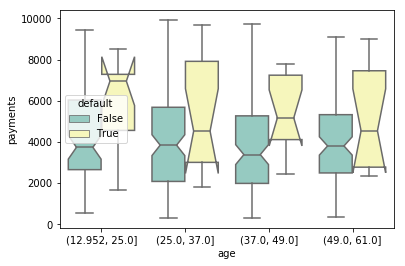

In [29]:
ax = sns.boxplot(x=pd.cut(data_train["age"], 4), y="payments", hue="default",
                  data=data_train, notch=True, palette="Set3") 

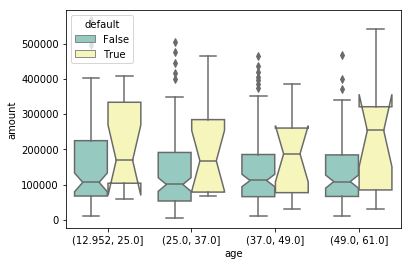

In [30]:
 ax = sns.boxplot(x=pd.cut(data_train["age"], 4), y="amount", hue="default",
                  data=data_train, notch=True, palette="Set3") 

Defaulters in general receive a higher amount than others and have to make larger payments. The amount given to defaulters is very spread out, typically the amount given to defaulters is higher, which is also reflected in the voilin graph. On the other hand, there are outliers where clients receive a substantial amount for the loan. 

In [3]:
with sns.axes_style(style=None):
    sns.violinplot(pd.cut(data["age"], 4), "amount", hue="default", data=data,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightgreen"]);

NameError: name 'sns' is not defined

In [1]:

with sns.axes_style(style=None):
    sns.violinplot(pd.cut(data_train["age"], 4), "payments", hue="default", data=data_train,
                   split=True, inner="quartile", 
                   palette=["lightblue", "lightgreen"], inner=None);

SyntaxError: keyword argument repeated (<ipython-input-1-ff5fee898818>, line 5)

Distributions are quite distinct, for instance for defaulters between the ages of 25 and 37, the amount granted to them in the form of a loan is more spread out.

In [33]:
sns.distplot(data_train.loc[data_train["default"], 'amount'], norm_hist=True, kde_kws={"label": "default"}) 
sns.distplot(data_train.loc[~data_train["default"], 'amount'], norm_hist=True,  kde_kws={"label": "No default"})

C:\Users\issam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


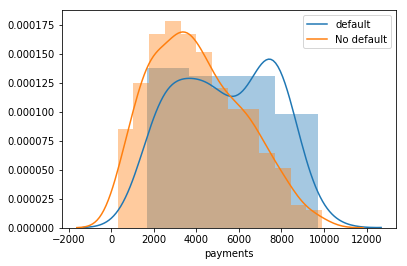

In [37]:
sns.distplot(data.loc[data["default"], 'payments'], norm_hist=True, kde_kws={"label": "default"}) 
sns.distplot(data.loc[~data["default"], 'payments'], norm_hist=True,  kde_kws={"label": "No default"})

The same conclusion can be drawn from these distributions, not much more to say.

In [34]:
import numpy as np 
sns.distplot(data_train.loc[data_train["default"], 'age'], norm_hist=True, kde_kws={"label": "default"})
sns.distplot(data_train.loc[~data_train["default"], 'age'], norm_hist=True,  kde_kws={"label": "No default"})  

The distributions are not very different from each other, what we can deduce from this is that customers under 25 years of age are more likely to be in default because at a young age, it is very difficult to repay the loan and there is a very high likelihood that they do not have a higher level of education.

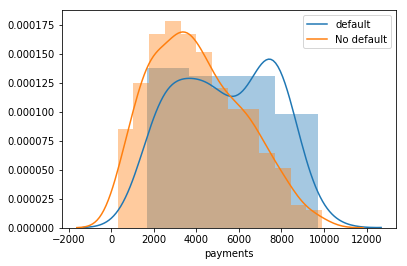

In [35]:
# import numpy as np 
sns.distplot(data.loc[data["default"], 'payments'], norm_hist=True, kde_kws={"label": "default"})
sns.distplot(data.loc[~data["default"], 'payments'], norm_hist=True, kde_kws={"label": "No default"})

The distribution for the defaulting borrower is much more spread out than for non-defaulting borrowers, to be expected, since when given a larger amount, it is much more complicated to reimburse the loan.

In [36]:
data.groupby("type_card")['default'].mean().plot.bar()

Customers who do not have a credit card are more likely to be in default, customers who have a traditional card are less likely to be in default, which may be the product of taking a smaller loan amount. 

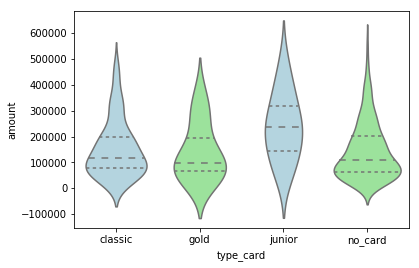

In [37]:
# We didn't consider the frequency 
with sns.axes_style(style=None):
    sns.violinplot("type_card", "amount", data=data_train,
                   split=True, inner="quartile", 
                   palette=["lightblue", "lightgreen"]);

Clients with a junior card are granted a higher average amount. Customers without a card and with the classic card are receiving a lower amount, which is why the distributions are wider.

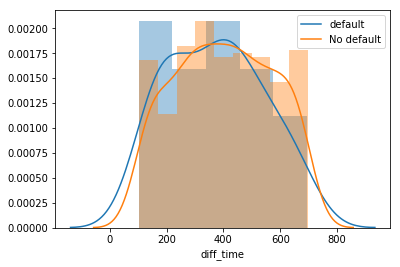

In [42]:
import numpy as np 
sns.distplot(data_train.loc[data_train["default"], 'diff_time'], norm_hist=True, kde_kws={"label": "default"})
sns.distplot(data_train.loc[~data_train["default"], 'diff_time'], norm_hist=True, kde_kws={"label": "No default"})

The more recent the user has opened the account, the more likely he/she is to be in credit default.

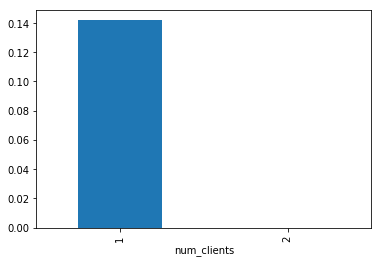

In [43]:
data_train.groupby("num_clients")['default'].mean().plot.bar()

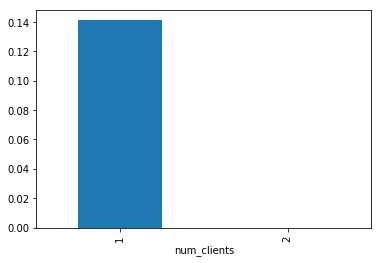

In [44]:
data_test.groupby("num_clients")['default'].mean().plot.bar()

We find that if the account is linked to multiple clients, there is no default, which is odd, perhaps due to the fact that they monitor each other, even in the test set, we have the same behaviour.

We observe the ratio of defaulters versus district.

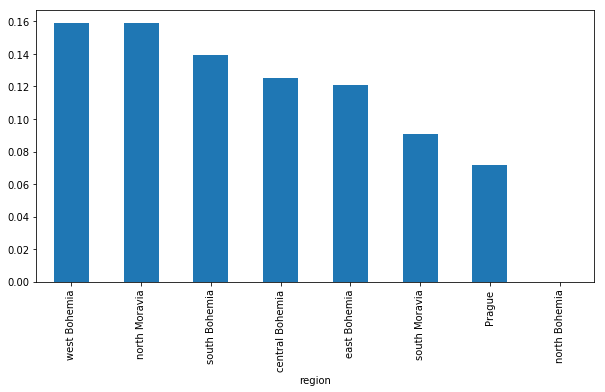

In [45]:
data_train.groupby("region")["default"].mean().sort_values(ascending=False).plot.bar(figsize=(10, 5))   

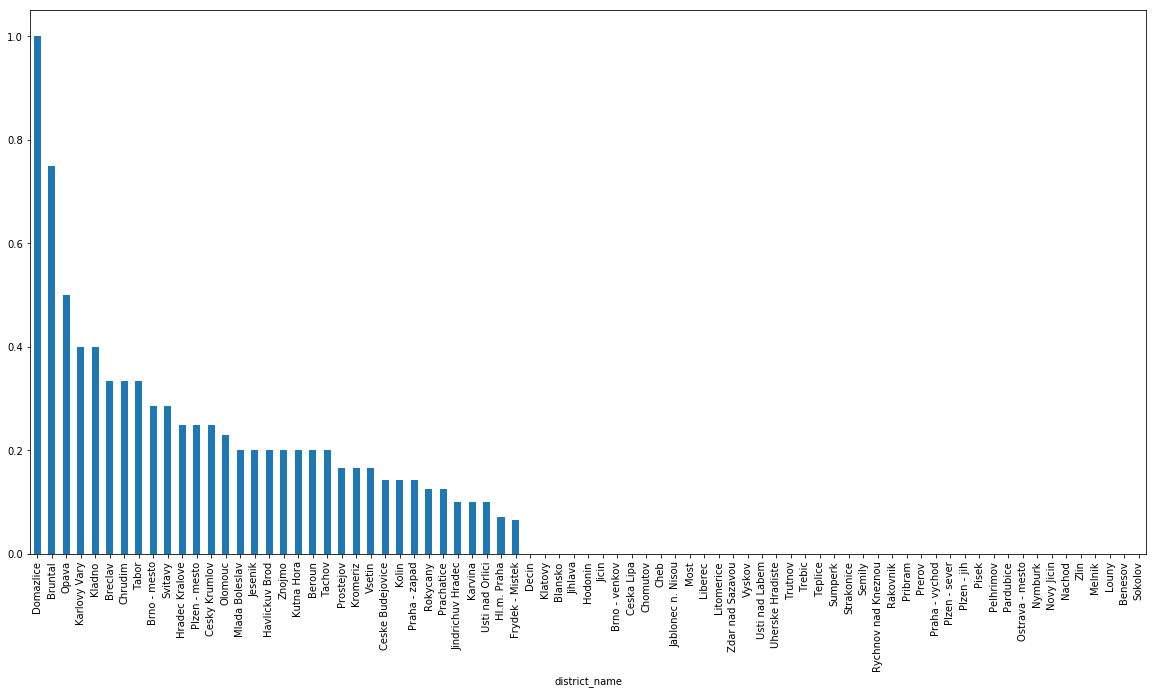

In [46]:
data_train.groupby("district_name")["default"].mean().sort_values(ascending=False).plot.bar(figsize=(20,10))  

The region and district play a significant role in identifying whether a client will default.

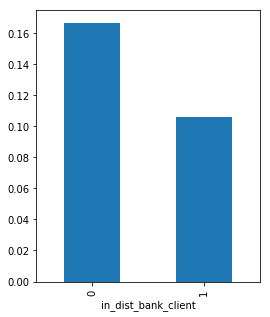

In [47]:
data_train.groupby("in_dist_bank_client")["default"].mean().sort_values(ascending=False).plot.bar(figsize=(4,5))      

If the user is not located in the same district as the bank, he is much more susceptible to default.

We investigate whether sex makes any difference in prediction. 

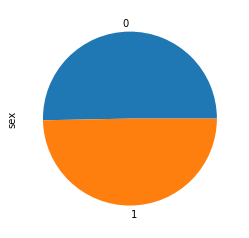

In [48]:
data_train["sex"].value_counts().plot.pie()

We have roughly as many males as females.

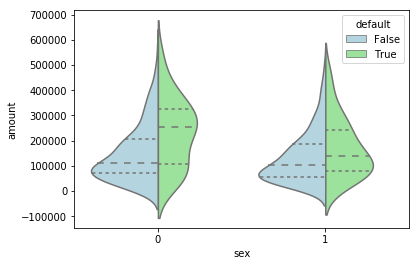

In [49]:
with sns.axes_style(style=None):
    sns.violinplot("sex", "amount", hue="default", data=data_train,
                   split=True, inner="quartile", 
                   palette=["lightblue", "lightgreen"]);

There are quite different distributions for men and women defaulters.

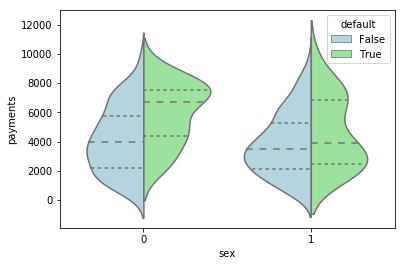

In [50]:
with sns.axes_style(style=None):
    sns.violinplot("sex", "payments", hue="default", data=data_train,
                   split=True, inner="quartile", 
                   palette=["lightblue", "lightgreen"]);

This shows that the variable sex must be retained because women have trouble paying their loans when payments are substantially higher.

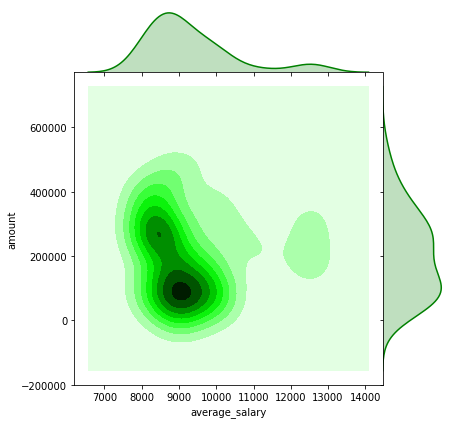

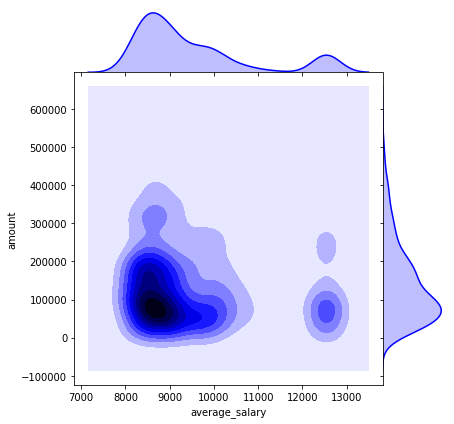

In [51]:

sns.jointplot("average_salary", "amount", data=data_train[data_train["default"]],
                   kind="kde", space=0, color="g")
sns.jointplot("average_salary", "amount", data=data_train[~data_train["default"]],
                   kind="kde", space=0, color="b") 

The average wage also influences the detection of defaults because the joint distributions are different.

I didn't explore other variables as to respect the time of the test :) 

<h2><font color="blue">4. Model construction</font></h2>

<h3><font color="cyan">4.1 Regression models</font></h3>

In [32]:
# importing useful libraries
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.combine import SMOTETomek

A function is developed to assess and select the best model with the highest f1 score using grid search or randomized search. 

In [33]:
def prediction(X_train, y_train, X_test, y_test, model, param_grid,scoring="f1", sc=False, cv=5, rs=False, st=False, n_jobs=-1):
    
    models = []
    list_pipline = list()
    
    if st:
        SM = SMOTETomek
    else:
        SM = RandomOverSampler
        
    if sc:  
        list_pipline.append(("sc", StandardScaler())) 
        
    list_pipline.append(("clf", model))
    
    print("without SMOTE"+st*"Tomek")
    pipe = Pipeline(list_pipline)
    if not rs:
        gs = GridSearchCV(pipe, cv=cv, n_jobs=n_jobs, param_grid=param_grid, refit=True )
    else:
        gs = RandomizedSearchCV(pipe, cv=cv, n_jobs=n_jobs, param_distributions=param_grid, refit=True, random_state=RANDOM_STATE )
    
    gs.fit(X_train, y_train) 
    print(classification_report(y_test, gs.predict(X_test))) 
    print(50*"-") 
    
    models.append(gs)
    
    print("With SMOTE"+st*"Tomek") 
    if sc:
        list_pipline.insert(1, ("sm", SM(random_state=RANDOM_STATE)))    
        
    else:
        X_sm, y_sm = SM(random_state=RANDOM_STATE).fit_sample(X_train, y_train)

    if not rs:
        gs = GridSearchCV(pipe, cv=cv, n_jobs=n_jobs, param_grid=param_grid, refit=True )
    else:
        gs = RandomizedSearchCV(pipe, cv=cv, n_jobs=n_jobs, param_distributions=param_grid, refit=True, random_state=RANDOM_STATE )
        
    if sc:
        gs.fit(X_train, y_train) 
    else:
        gs.fit(X_sm, y_sm)
        
    print(classification_report(y_test, gs.predict(X_test))) 
    
    models.append(gs)
    
    return  models 

We try different linear models. 

The problem is that we have an imbalanced data set, we use the SMOTE method to balance the data set.

In [56]:
Xl_train = X_train.copy() 
Xl_test = X_test.copy() 

In [57]:
# remove status class 
Xl_train.drop(columns="status", inplace=True)
Xl_test.drop(columns="status", inplace=True)

In [58]:
# one hot encode categorical columns
cat_columns = ["in_dist_bank_client", "sex", "duration", "frequency", "type_card", 'district_name', 'region']
one_hot_encode = pd.get_dummies(data[cat_columns])
Xl_train = Xl_train.join(one_hot_encode.iloc[Xl_train.index]).drop(columns = cat_columns)
Xl_test = Xl_test.join(one_hot_encode.iloc[Xl_test.index]).drop(columns = cat_columns)  

In [59]:
# Convert time values into int 
date_columns = ["date_loan", "birth_number", "date_account"]
Xl_train[date_columns] = Xl_train[date_columns].astype("int64")
Xl_test[date_columns] = Xl_test[date_columns].astype("int64")   

In [60]:
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
degrees = [1,2,3,4,5]  
param_grid = {'clf__C': Cs, "clf__degree": degrees}
svc = SVC(kernel='poly', random_state=RANDOM_STATE)      
models = prediction(Xl_train, y_train["default"], Xl_test, y_test["default"], svc, param_grid, sc=True)

without SMOTE
             precision    recall  f1-score   support

      False       0.91      1.00      0.95       182
       True       1.00      0.17      0.30        23

avg / total       0.92      0.91      0.88       205

--------------------------------------------------
With SMOTE
             precision    recall  f1-score   support

      False       0.90      0.99      0.94       182
       True       0.50      0.09      0.15        23

avg / total       0.85      0.89      0.85       205



We experiment with different values for the variable C and degrees for the the kernel trick, we find that the model has an f1 of 30 percent without SMOTE, 15 percent otherwise. SMOTE didn't increase the model performance.

In [61]:
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]  
param_grid = {'clf__C': Cs}
svc = LogisticRegression(penalty='l1', solver="liblinear", random_state=RANDOM_STATE)   
models = prediction(Xl_train, y_train["default"], Xl_test, y_test["default"], svc, param_grid, sc=True)  

without SMOTE
             precision    recall  f1-score   support

      False       0.91      0.99      0.95       182
       True       0.83      0.22      0.34        23

avg / total       0.90      0.91      0.88       205

--------------------------------------------------
With SMOTE
             precision    recall  f1-score   support

      False       0.89      1.00      0.94       182
       True       0.00      0.00      0.00        23

avg / total       0.79      0.89      0.84       205



C:\Users\issam\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


We could also try a polynomial transformation with logistic regression to improve performance. The data is likely not linearely separable.

With a logistic regression classifier, the value of the score f1 is 0% with SMOTE, the f1 score is 34 without SMOTE, we now move on to tree models and see if their performance increases. 

Linear model does not work well for this problem. Tree models tend to have a higher efficiency for classification problems.

<h3><font color="cyan">4.1 Tree models</font></h3>

In [34]:
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import tree

In [38]:
cat_columns = ["in_dist_bank_client", "sex", "duration", "frequency", "type_card", 'district_name', 'region']

<p>The numbers are selected based on the fact that we observed that customers who did not have a card behaved similarly to customers with a classic card, also customers with a gold card are close to those with a classic card, same customers with a junior card are close to those with a gold card, for the frequency we choose the numbers based on the description of the data set:</p>
<p>Frequency of issuance of statements: "POPLATEK MESICNE" stands for monthly issuance "POPLATEK TYDNE" stands for weekly issuance "POPLATEK PO OBRATU" stands for issuance after transaction.</p>

In [39]:
map_card = {"no_card":0, "classic":1, "gold":2, "junior":4}
map_frequency = {"POPLATEK PO OBRATU":0, "POPLATEK TYDNE":1, "POPLATEK MESICNE":2} 
date_columns = ["date_loan", "birth_number", "date_account"]

We omit the name of the region and district as they are encoded in other numerical variables such as the number of inhabitants and because they are composed of several classes, tree models are not effective when a column is hot encoded, and not much performance gain, since a hot encoded variable is not considered as an entire variable.

In [41]:
Xt_train = X_train.copy().drop(columns="status")
Xt_test = X_test.copy().drop(columns="status")
 
cat_columns = ['district_name', 'region']


Xt_train.drop(columns=cat_columns, inplace=True)
Xt_test.drop(columns=cat_columns, inplace=True) 

# standard scaler is not needed

# data_loan increases with time, we must omit the variable, it cannot be captured with tree models.


date_columns = [ "birth_number", "date_account"]
 
Xt_train.drop(columns="date_loan", inplace=True) 
Xt_test.drop(columns="date_loan", inplace=True) 
Xt_train[date_columns] = Xt_train[date_columns].astype("int64")
Xt_test[date_columns] = Xt_test[date_columns].astype("int64") 
 
Xt_train["frequency"] = Xt_train["frequency"].map(map_frequency)
Xt_train["type_card"] = Xt_train["type_card"].map(map_card)
Xt_test["frequency"] = Xt_test["frequency"].map(map_frequency)
Xt_test["type_card"] = Xt_test["type_card"].map(map_card)  

In [42]:

max_depth_range = list(range(8, 32))     
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True) 
# balanced to take into account that the data is imbalanced
dt = DecisionTreeClassifier(class_weight="balanced", random_state=RANDOM_STATE)  
param_grid = {'clf__max_depth': max_depth_range,
             'clf__min_samples_leaf': min_samples_leafs} 

models = prediction(Xt_train, y_train["default"],  
                    Xt_test, y_test["default"], dt, param_grid=param_grid) 

without SMOTE
             precision    recall  f1-score   support

      False       0.95      0.74      0.83       182
       True       0.25      0.70      0.37        23

avg / total       0.87      0.73      0.78       205

--------------------------------------------------
With SMOTE
             precision    recall  f1-score   support

      False       0.97      0.81      0.88       182
       True       0.34      0.78      0.47        23

avg / total       0.90      0.80      0.83       205



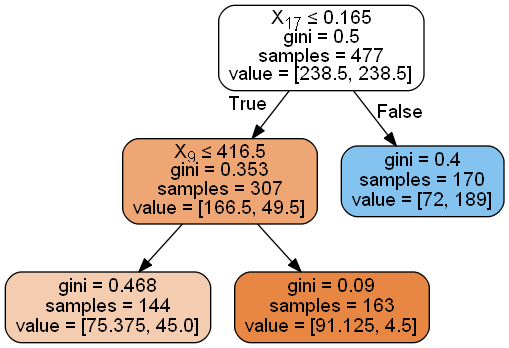

In [43]:
# visualise tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(models[0].best_estimator_.steps[0][1], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [44]:
# for the sake of time, I didn't use other parameters
rf = RandomForestClassifier(n_estimators=1000, n_jobs=-1, class_weight="balanced", random_state=RANDOM_STATE)  
param_grid = {'clf__min_samples_split': [ 2, 5, 10],
             'clf__n_estimators': [100, 300, 1000]} 

models = prediction(Xt_train, y_train["default"],  
                    Xt_test, y_test["default"], rf, param_grid=param_grid)   

without SMOTE
             precision    recall  f1-score   support

      False       0.94      0.98      0.96       182
       True       0.75      0.52      0.62        23

avg / total       0.92      0.93      0.92       205

--------------------------------------------------
With SMOTE
             precision    recall  f1-score   support

      False       0.94      0.98      0.96       182
       True       0.75      0.52      0.62        23

avg / total       0.92      0.93      0.92       205



RandomForest and TreeModel seem to be performing well, for example, Decision Tree reaches 61 f1 score without SMOTE, and 68 for Random Forest with SMOTE. SMOTE generally tends to increase recall at the expense of precision.

We explore the importance of features, we observe that the designed features are the strongest in terms of identifying whether a loan will default or not.

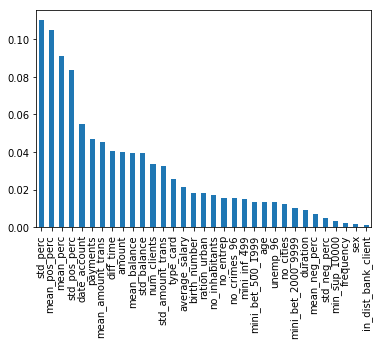

In [46]:
# no smote
pd.Series(models[0].best_estimator_.steps[0][1] .feature_importances_, index=Xt_train.columns).sort_values(ascending=False).plot.bar()

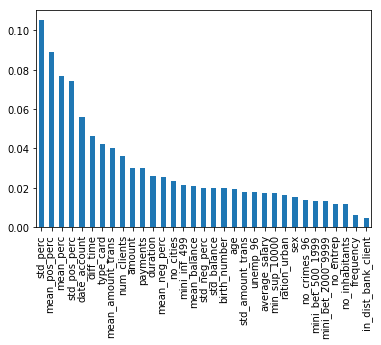

In [47]:
# smote
pd.Series(models[1].best_estimator_.steps[0][1] .feature_importances_, index=Xt_train.columns).sort_values(ascending=False).plot.bar()

The model performs quite well with a high f1 score of 68 and a precision of 78 even if the data is skewed and there is not enough data, high precision is a reliable guarantee against not giving people who cannot repay a loan, yet it comes at the cost of the recall, favouring recall or accuracy is a decision of the bank. We should add other features to increase the recall with feature engineering.

In [46]:
import warnings
warnings.filterwarnings('ignore')
param_grid = { 
    'clf__max_depth': range (2, 10, 1),
    'clf__n_estimators': range(60, 220, 40),
    'clf__learning_rate': [0.1, 0.01, 0.05]
}
xg = XGBClassifier(
    scale_pos_weight=float(np.sum((1-y_train))/np.sum(y_train)),
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)
models = []
gs = GridSearchCV(xg, cv=5, n_jobs=1, param_grid=param_grid, refit=True ) 
gs.fit(Xt_train.to_numpy(), y_train)
models.append(gs)
print(classification_report(y_test, gs.predict(Xt_test.to_numpy())))
X_sm, y_sm = RandomOverSampler(random_state=RANDOM_STATE).fit_sample(Xt_train, y_train) 
xg = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

gs = GridSearchCV(xg, cv=5, n_jobs=1, param_grid=param_grid, refit=True ) 
gs.fit(X_sm, y_sm)
models.append(gs)
print(50*'-') 
print(classification_report(y_test, gs.predict(Xt_test.to_numpy()))) 
 

             precision    recall  f1-score   support

      False       0.96      0.94      0.95       182
       True       0.58      0.65      0.61        23

avg / total       0.91      0.91      0.91       205

--------------------------------------------------
             precision    recall  f1-score   support

      False       0.95      0.95      0.95       182
       True       0.58      0.61      0.60        23

avg / total       0.91      0.91      0.91       205



In [32]:
!pip install --user imblearn

In [31]:
from imblearn.over_sampling import SMOTENC

ImportError: cannot import name 'SMOTENC' from 'imblearn.over_sampling' (C:\Users\issam\Anaconda3\lib\site-packages\imblearn\over_sampling\__init__.py)

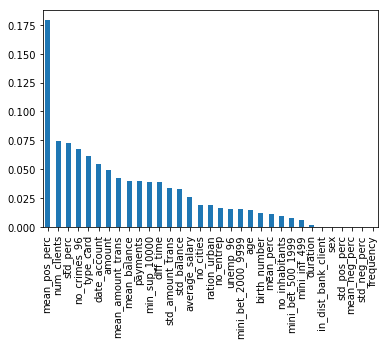

In [49]:
pd.Series(models[0].best_estimator_.feature_importances_, index=Xt_train.columns).sort_values(ascending=False).plot.bar()

We obtain a value of 70 for the score f1 and 70 for the recall and precision with SMOTE, which shows the interest of the model. It is the best f1 model made to date. Tree models are more efficient for predicting credit defaults.

<p>What's next ?</p>
<p>We could try feature engineering to improve the recall.</p>
<p>We could examine other features and search for other combinations.</p>
<p>Use GridSearch for SMOTE.</p>
<p>Determine whether eliminating classes C and D will result in a performance gain.</p>
<p><p>The model's performance is adequate given the data, however it may be improved further.</p>

I hope you enjoyed reading this notebook :)